# Tests on BCE simulations

Molecular recognition processes can be explained under different paradigms. Lock and key mechanism, induced fit or conformational selection. In the conformational selection model, the ligand is able to adopt the bioactive conformation in solution and the receptor selects it. The more stable is this bioactive conformation in solution, the smaller the entropic penalty due to binding and thus, the higher the affinity. Some cases that might scape this model are molecular recognition processes involving many strong interactions. As the entropy loss due to binding might be compensated by the enthalpy gain due to favorable interactions. 

The bioactive conformational ensemble modelling approach aims at estimating the dynamical landscape of the ligand in solution. This is done by performing enhanced molecular dynamics (replica exchange with solute tempering REST2) to sample the conformational space of the ligand. Then the ensemble of conformations is clustered and geometry of the centroid from each cluster is optimized with self-consistent reaction field quantum mechanics (SCRF-QM) calculations. Thus one obtains sampling of different conformations and two estimates of free energy differences. One coming from a classical force field and another from the SCRF-QM calculations. Both in good agreement for the dataset of the original paper, see the full description of the method in [Orozco et al.](https://pubs.acs.org/doi/10.1021/acs.jctc.0c00304).

Here we will consider 3 different peptides with known affinities and active conformations. The peptides are peptide 1, peptide 2 and peptide 7 from [Yu et al. publication](https://pubs.acs.org/doi/abs/10.1021/acs.jcim.3c01359). The binding affinities are shown in the table below.

| Peptide | Affinity (nM) |
|---------|---------------|
| 1       | 1.5           |
| 2       | 285           |
| 7       | 0.00826       |

If the conformational selection mechanism describes well the binding process for these peptides, we should expect a correlation between the affinity and the stability of the bioactive conformation in solution. Here, we will project both BCE sampling (classical MD + replica exchange) together with the bioactive conformation onto different collective variables for each peptide. And we will check if the affinity correlates with the stability of the bioactive conformation.

NOTE: In the new version the Affinity doesn't correlate anymore - check this in detail


In [1]:
from deep_cartograph.run import deep_cartograph
import importlib.resources as resources
from deep_cartograph import data

from IPython.display import Image, display
from typing import Literal
import logging
import shutil
import yaml
import os

# Get the path to the data
data_folder = resources.files(data)

# Set logging level
logging.basicConfig(level=logging.INFO)

def run_deep_cartograph(system_name: str, features: Literal['torsions', 'distances']):

    # Input configuration
    config_path = f"{data_folder}/peptide_ensemble/input/{features}_config.yml"

    with open(config_path) as config_file:
        configuration = yaml.load(config_file, Loader = yaml.FullLoader)

    # Input trajectory and topology
    input_path = f"{data_folder}/peptide_ensemble/input/{system_name}"
    traj_path = os.path.join(input_path, f'{system_name}.xtc')
    top_path = os.path.join(input_path, f'{system_name}.pdb')

    # Input reference structure
    reference_data = f"{data_folder}/peptide_ensemble/input/{system_name}/active_conformation"
        
    # Output folder
    output_folder = f"{data_folder}/peptide_ensemble/output/{system_name}/{features}"

    # Clean output folder
    if os.path.exists(output_folder):
        shutil.rmtree(output_folder)

    # Run workflow 
    deep_cartograph(
        configuration = configuration,
        trajectory_data = traj_path,
        topology_data = top_path,
        ref_trajectory_data = reference_data,
        ref_topology_data = reference_data,
        label_reference = True,
        output_folder = output_folder)

def show_results(system_name: str, features: Literal['torsions', 'distances'], model_name: str):

    # Output folder
    output_folder = f"{data_folder}/peptide_ensemble/output/{system_name}/{features}"
    
    # Training folder
    training_folder = os.path.join(output_folder, 'train_colvars')

    # Model folder
    model_folder = os.path.join(training_folder, model_name)

    # Paths to images
    loss = os.path.join(model_folder, 'loss.png')
    trajectory_clustered = os.path.join(model_folder, system_name, 'trajectory_clustered.png')
    fes = os.path.join(model_folder, system_name, 'fes/fes.png')
    paths = [loss, trajectory_clustered, fes]

    # Instantiate Image objects
    images = [Image(filename=path, width=500) for path in paths if os.path.exists(path)]

    # Display images
    display(*images)

## Peptide 1

In [2]:
run_deep_cartograph('peptide1', 'torsions')
run_deep_cartograph('peptide1', 'distances')
run_deep_cartograph('peptide1', 'all')

INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/peptide1.xtc
/home/pnavarro/.conda/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/pnavarro/.conda/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:747: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 348 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED drive

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/peptide1.xtc


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 07 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/active_conformation/active_conformation.pdb
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 348 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide1/torsions/compute_features/active_conformation/torsions.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide1/torsions/compute_features/active_conformation/active_conformation.pdb --natoms 171


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/active_conformation/active_conformation.pdb


INFO:deep_cartograph.tools.filter_features.filtering:Filtered 162 features.
INFO:deep_cartograph:Elapsed time (Filter features): 00 h 00 min 26 s
INFO:deep_cartograph.modules.common.common: Using features in /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide1/torsions/filter_features/filtered_features.txt
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of Collective Variables
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of collective variables using the mlcolvar library.
INFO:deep_cartograph.tools.train_colvars.train_colvars_workflow:Collective variables to compute: ['pca', 'ae']
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Reading training data from colvars files...
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Number of features: 186
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Number of samples: 5001
INFO:deep_cartograph.tools.tra

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/peptide1.xtc


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 09 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/active_conformation/active_conformation.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 835 features for dist
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide1/distances/compute_features/active_conformation/distances.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide1/distances/compute_features/active_conformation/active

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/active_conformation/active_conformation.pdb


INFO:deep_cartograph:Note that the all features must be in the same units to apply the entropy and standard deviation filters meaningfully.
INFO:deep_cartograph:Initial size of features set: 835.
INFO:deep_cartograph.tools.filter_features.filtering:Computing dip test.
INFO:deep_cartograph.tools.filter_features.filtering:Filtered 611 features.
INFO:deep_cartograph:Elapsed time (Filter features): 00 h 02 min 27 s
INFO:deep_cartograph.modules.common.common: Using features in /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide1/distances/filter_features/filtered_features.txt
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of Collective Variables
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of collective variables using the mlcolvar library.
INFO:deep_cartograph.tools.train_colvars.train_colvars_workflow:Collective variables to compute: ['pca', 'ae']
INFO:deep_cartogr

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/peptide1.xtc


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 15 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/active_conformation/active_conformation.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 835 features for dist
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 348 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide1/all/compute_features/active_conformation/all.dat -

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide1/active_conformation/active_conformation.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:==================
INFO:deep_cartograph:Filtering features
INFO:deep_cartograph:==================
INFO:deep_cartograph:Finding the features that contains the most information about the transitions or conformational changes.
INFO:deep_cartograph:The following algorithms are available:
INFO:deep_cartograph:- Hartigan's dip test filter. Keeps features that are not unimodal.
INFO:deep_cartograph:- Shannon entropy filter. Keeps features with entropy greater than a threshold.
INFO:deep_cartograph:- Standard deviation filter. Keeps features with standard deviation greater than a threshold.
INFO:deep_cartograph:Note that the all features must be in the same units to apply the entropy and standard deviation filters meaningfully.
INFO:deep_cartograph:Initial size of features set: 1183.
INFO:deep_cartograph.tools.filter_features.filtering:Computing dip test.


### PCA

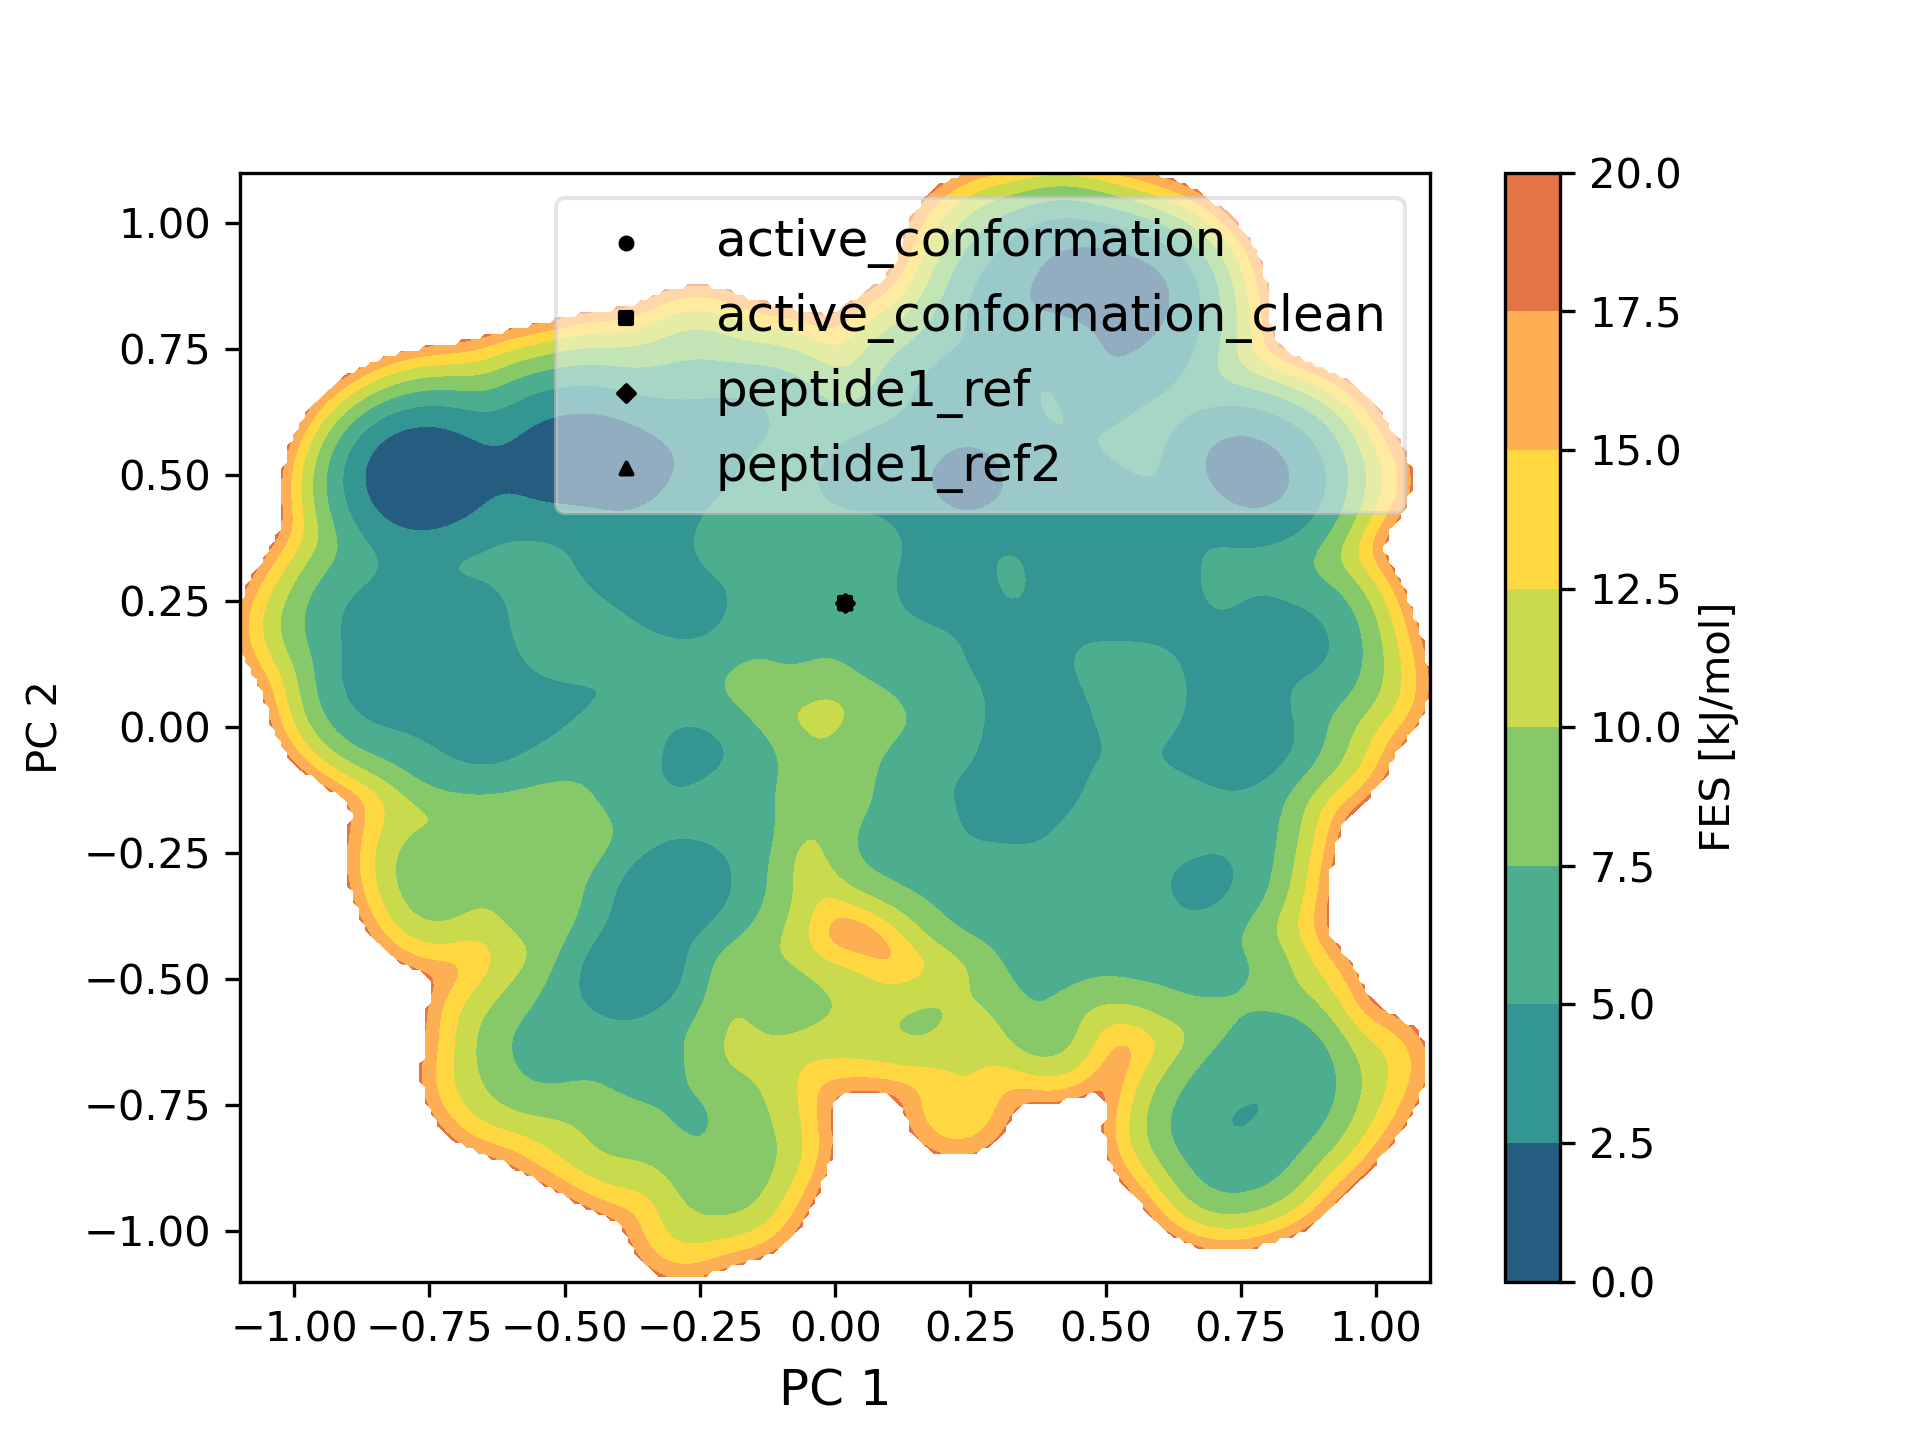

In [3]:
show_results('peptide1', 'all', 'pca')

### AE

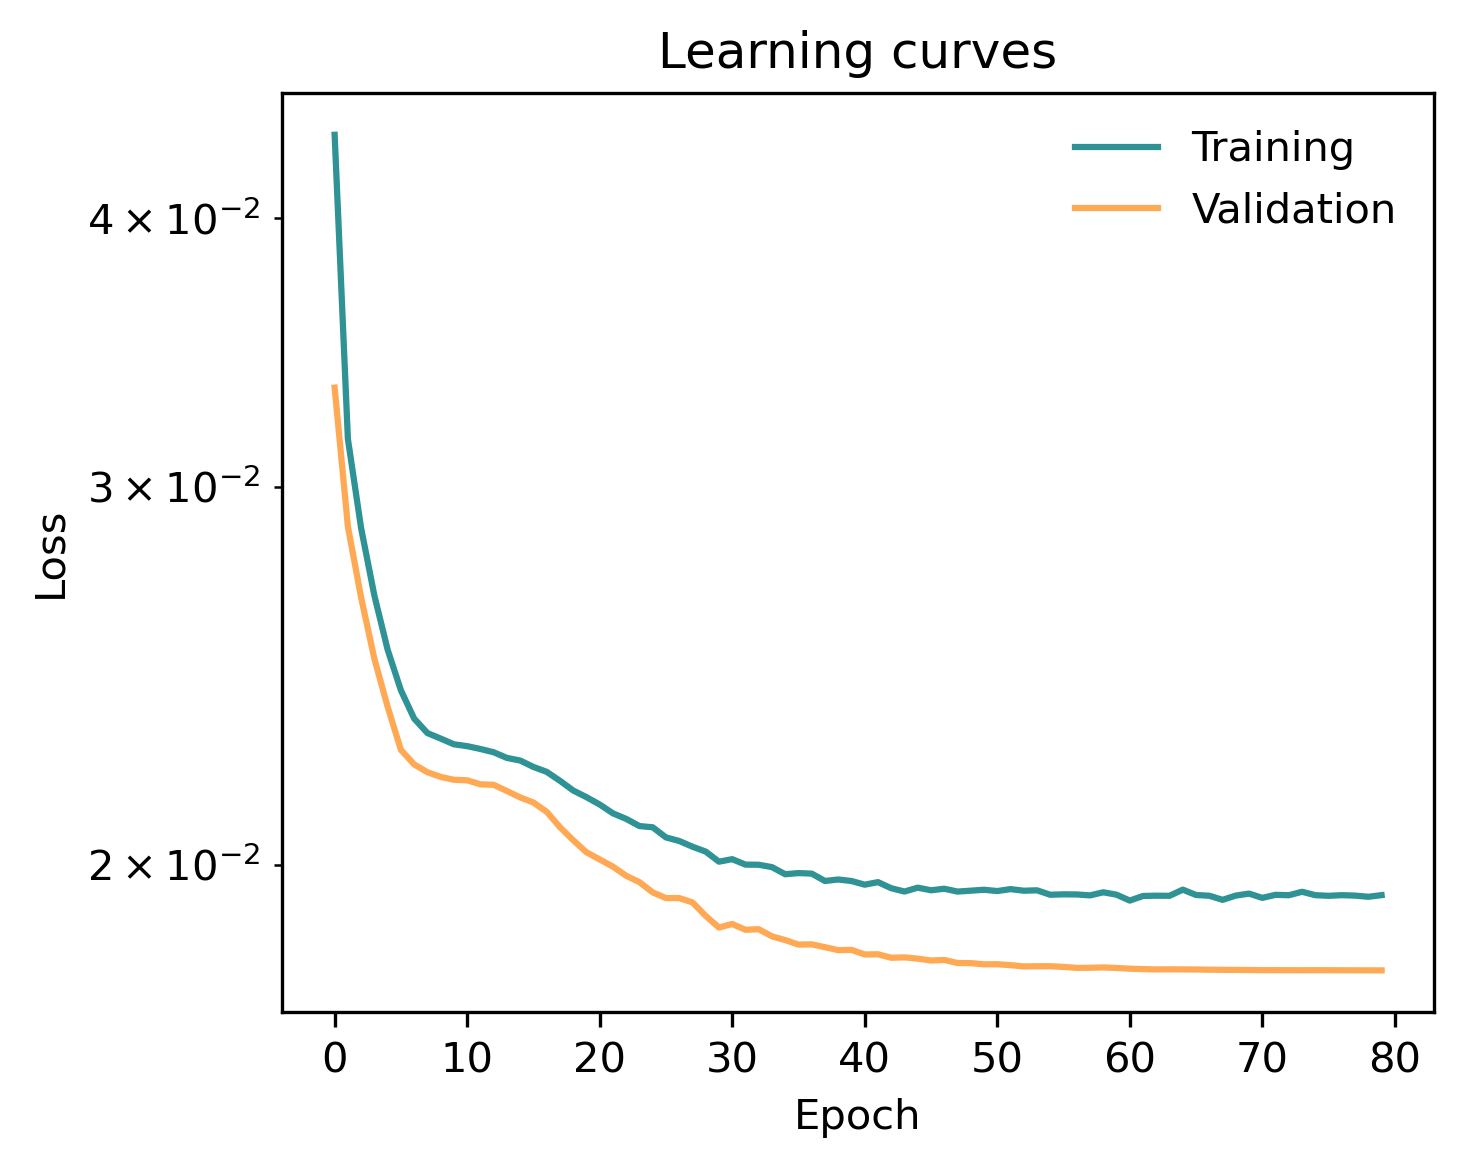

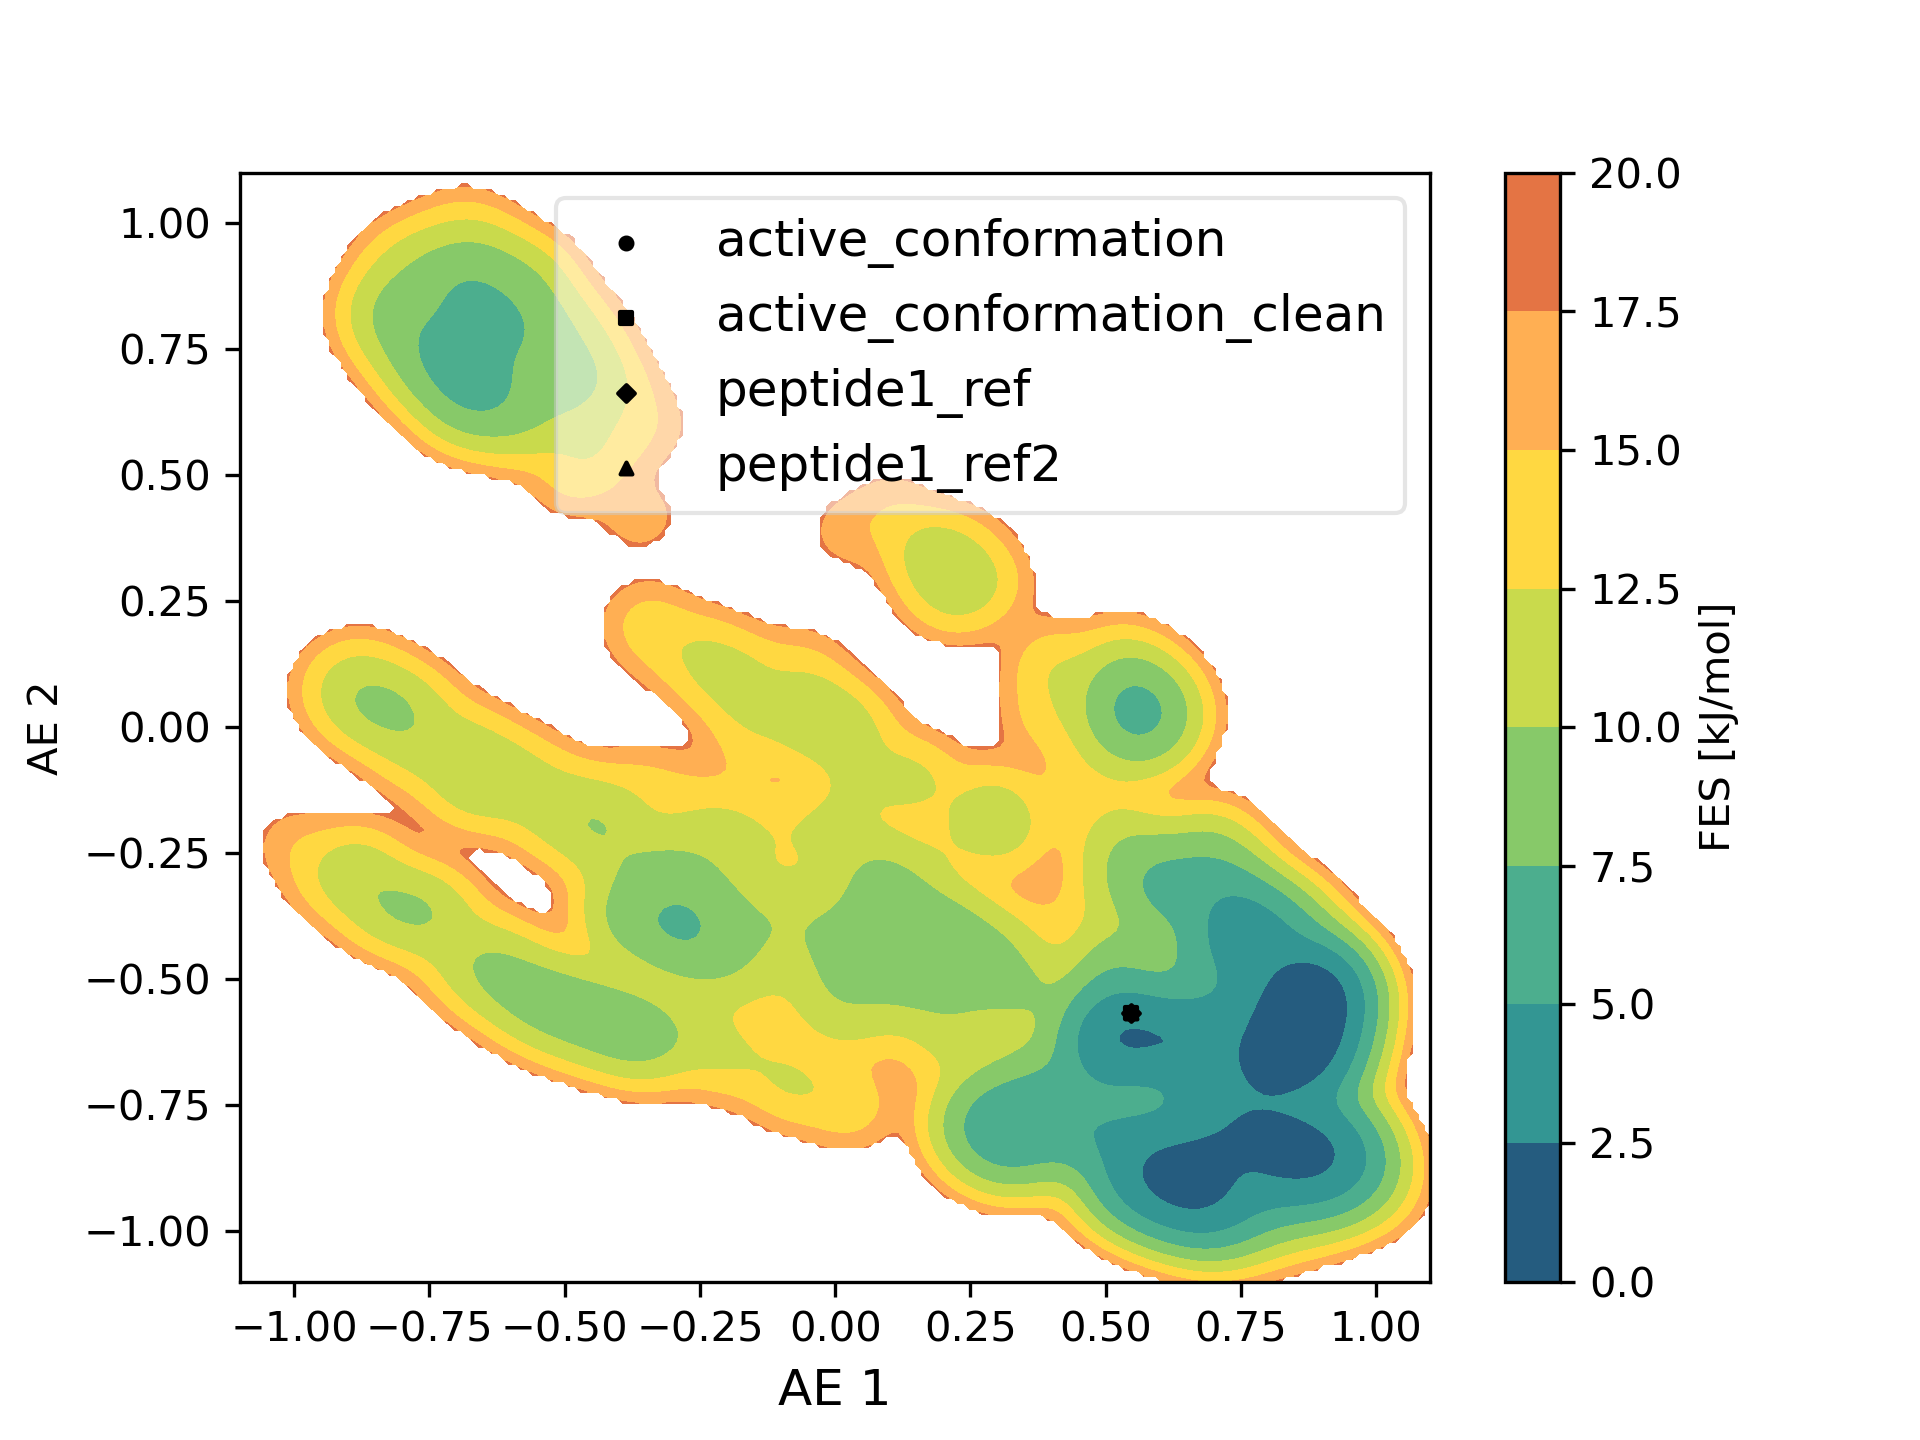

In [12]:
show_results('peptide1', 'all', 'ae')

## Peptide 2

INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/peptide2.xtc
/home/pnavarro/.conda/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/pnavarro/.conda/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:747: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 346 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED drive

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/peptide2.xtc


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 06 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation.pdb
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 346 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/torsions/compute_features/active_conformation/torsions.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/torsions/compute_features/active_conformation/active_conformation.pdb --natoms 168


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation.pdb


INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 346 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/torsions/compute_features/active_conformation_cleaned/torsions.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation_cleaned.pdb --natoms 168
INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref.pdb
INFO:deep_cartogra

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation_cleaned.pdb
Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref.pdb


INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/torsions/compute_features/peptide2_ref/torsions.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref.pdb --natoms 168
INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref2.pdb
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 346 features for tor
INFO:deep_cartograph.modules.plumed.utils:Execu

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref2.pdb


INFO:deep_cartograph.tools.filter_features.filtering:Filtered 162 features.
INFO:deep_cartograph:Elapsed time (Filter features): 00 h 00 min 29 s
INFO:deep_cartograph.modules.common.common: Using features in /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/torsions/filter_features/filtered_features.txt
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of Collective Variables
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of collective variables using the mlcolvar library.
INFO:deep_cartograph.tools.train_colvars.train_colvars_workflow:Collective variables to compute: ['pca', 'ae']
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Reading training data from colvars files...
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Number of features: 184
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Number of samples: 5001
INFO:deep_cartograph.tools.tra

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/peptide2.xtc


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 08 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 745 features for dist
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/distances/compute_features/active_conformation/distances.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/distances/compute_features/active_conformation/active

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation.pdb


INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 745 features for dist
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/distances/compute_features/active_conformation_cleaned/distances.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation_cleaned.pdb --natoms 168
INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation_cleaned.pdb


INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 745 features for dist
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/distances/compute_features/peptide2_ref/distances.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref.pdb --natoms 168
INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartogra

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref.pdb


INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 745 features for dist
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/distances/compute_features/peptide2_ref2/distances.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref2.pdb --natoms 168
INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:==================
INFO:deep_cartograph:Filtering features
INFO:deep_cartograph:==================
INFO:deep_cartograph:Finding the features that contains the most information about the transitions or conformational changes.
INFO:deep_cartograph:The following algorithms are available:


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref2.pdb


INFO:deep_cartograph.tools.filter_features.filtering:Filtered 521 features.
INFO:deep_cartograph:Elapsed time (Filter features): 00 h 01 min 58 s
INFO:deep_cartograph.modules.common.common: Using features in /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/distances/filter_features/filtered_features.txt
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of Collective Variables
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of collective variables using the mlcolvar library.
INFO:deep_cartograph.tools.train_colvars.train_colvars_workflow:Collective variables to compute: ['pca', 'ae']
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Reading training data from colvars files...
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Number of features: 224
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Number of samples: 5001
INFO:deep_cartograph.tools.tr

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/peptide2.xtc


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 14 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 745 features for dist
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 346 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/all/compute_features/active_conformation/all.dat -

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation_cleaned.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 745 features for dist
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 346 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/all/compute_features/active_conformation_c

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/active_conformation_cleaned.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 745 features for dist
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 346 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/all/compute_features/peptide2_ref/all.dat --mf_pdb /home/

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref2.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 745 features for dist
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 346 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide2/all/compute_features/peptide2_ref2/all.dat --mf_pdb /hom

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide2/active_conformation/peptide2_ref2.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:==================
INFO:deep_cartograph:Filtering features
INFO:deep_cartograph:==================
INFO:deep_cartograph:Finding the features that contains the most information about the transitions or conformational changes.
INFO:deep_cartograph:The following algorithms are available:
INFO:deep_cartograph:- Hartigan's dip test filter. Keeps features that are not unimodal.
INFO:deep_cartograph:- Shannon entropy filter. Keeps features with entropy greater than a threshold.
INFO:deep_cartograph:- Standard deviation filter. Keeps features with standard deviation greater than a threshold.
INFO:deep_cartograph:Note that the all features must be in the same units to apply the entropy and standard deviation filters meaningfully.
INFO:deep_cartograph:Initial size of features set: 1091.
INFO:deep_cartograph.tools.filter_features.filtering:Computing dip test.
INFO:deep_cartograph.tools.filter_features.filt

<Figure size 640x480 with 0 Axes>

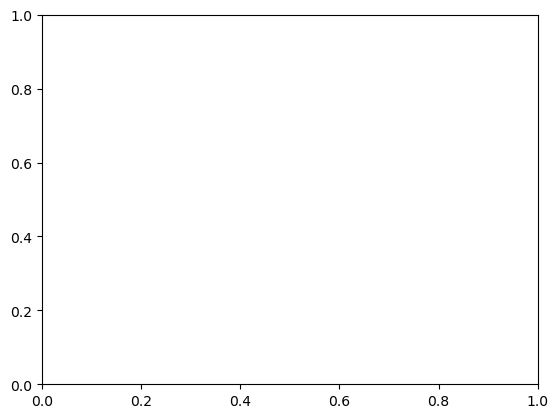

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

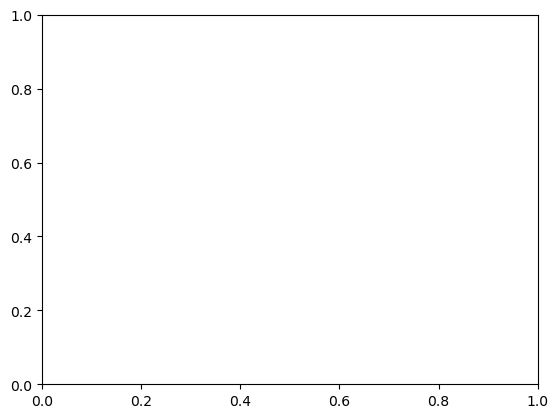

<Figure size 640x480 with 0 Axes>

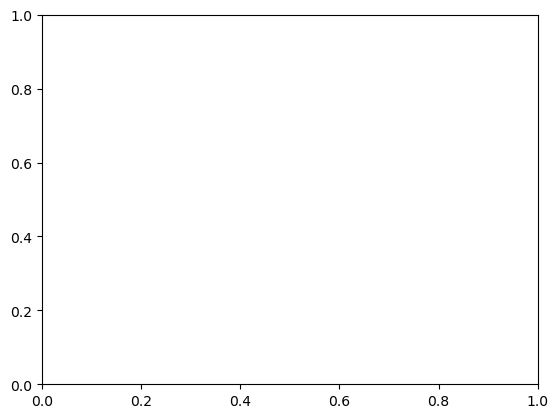

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

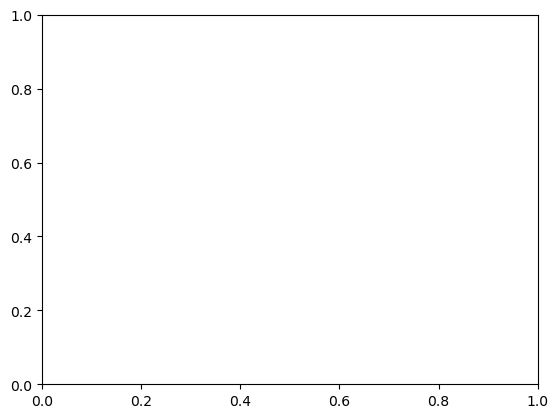

<Figure size 640x480 with 0 Axes>

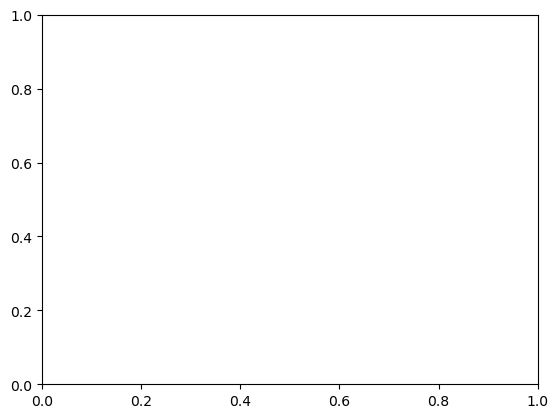

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

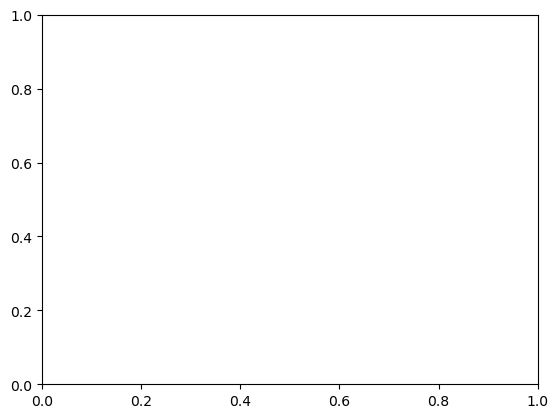

In [5]:

run_deep_cartograph('peptide2', 'torsions')
run_deep_cartograph('peptide2', 'distances')
run_deep_cartograph('peptide2', 'all')

### PCA

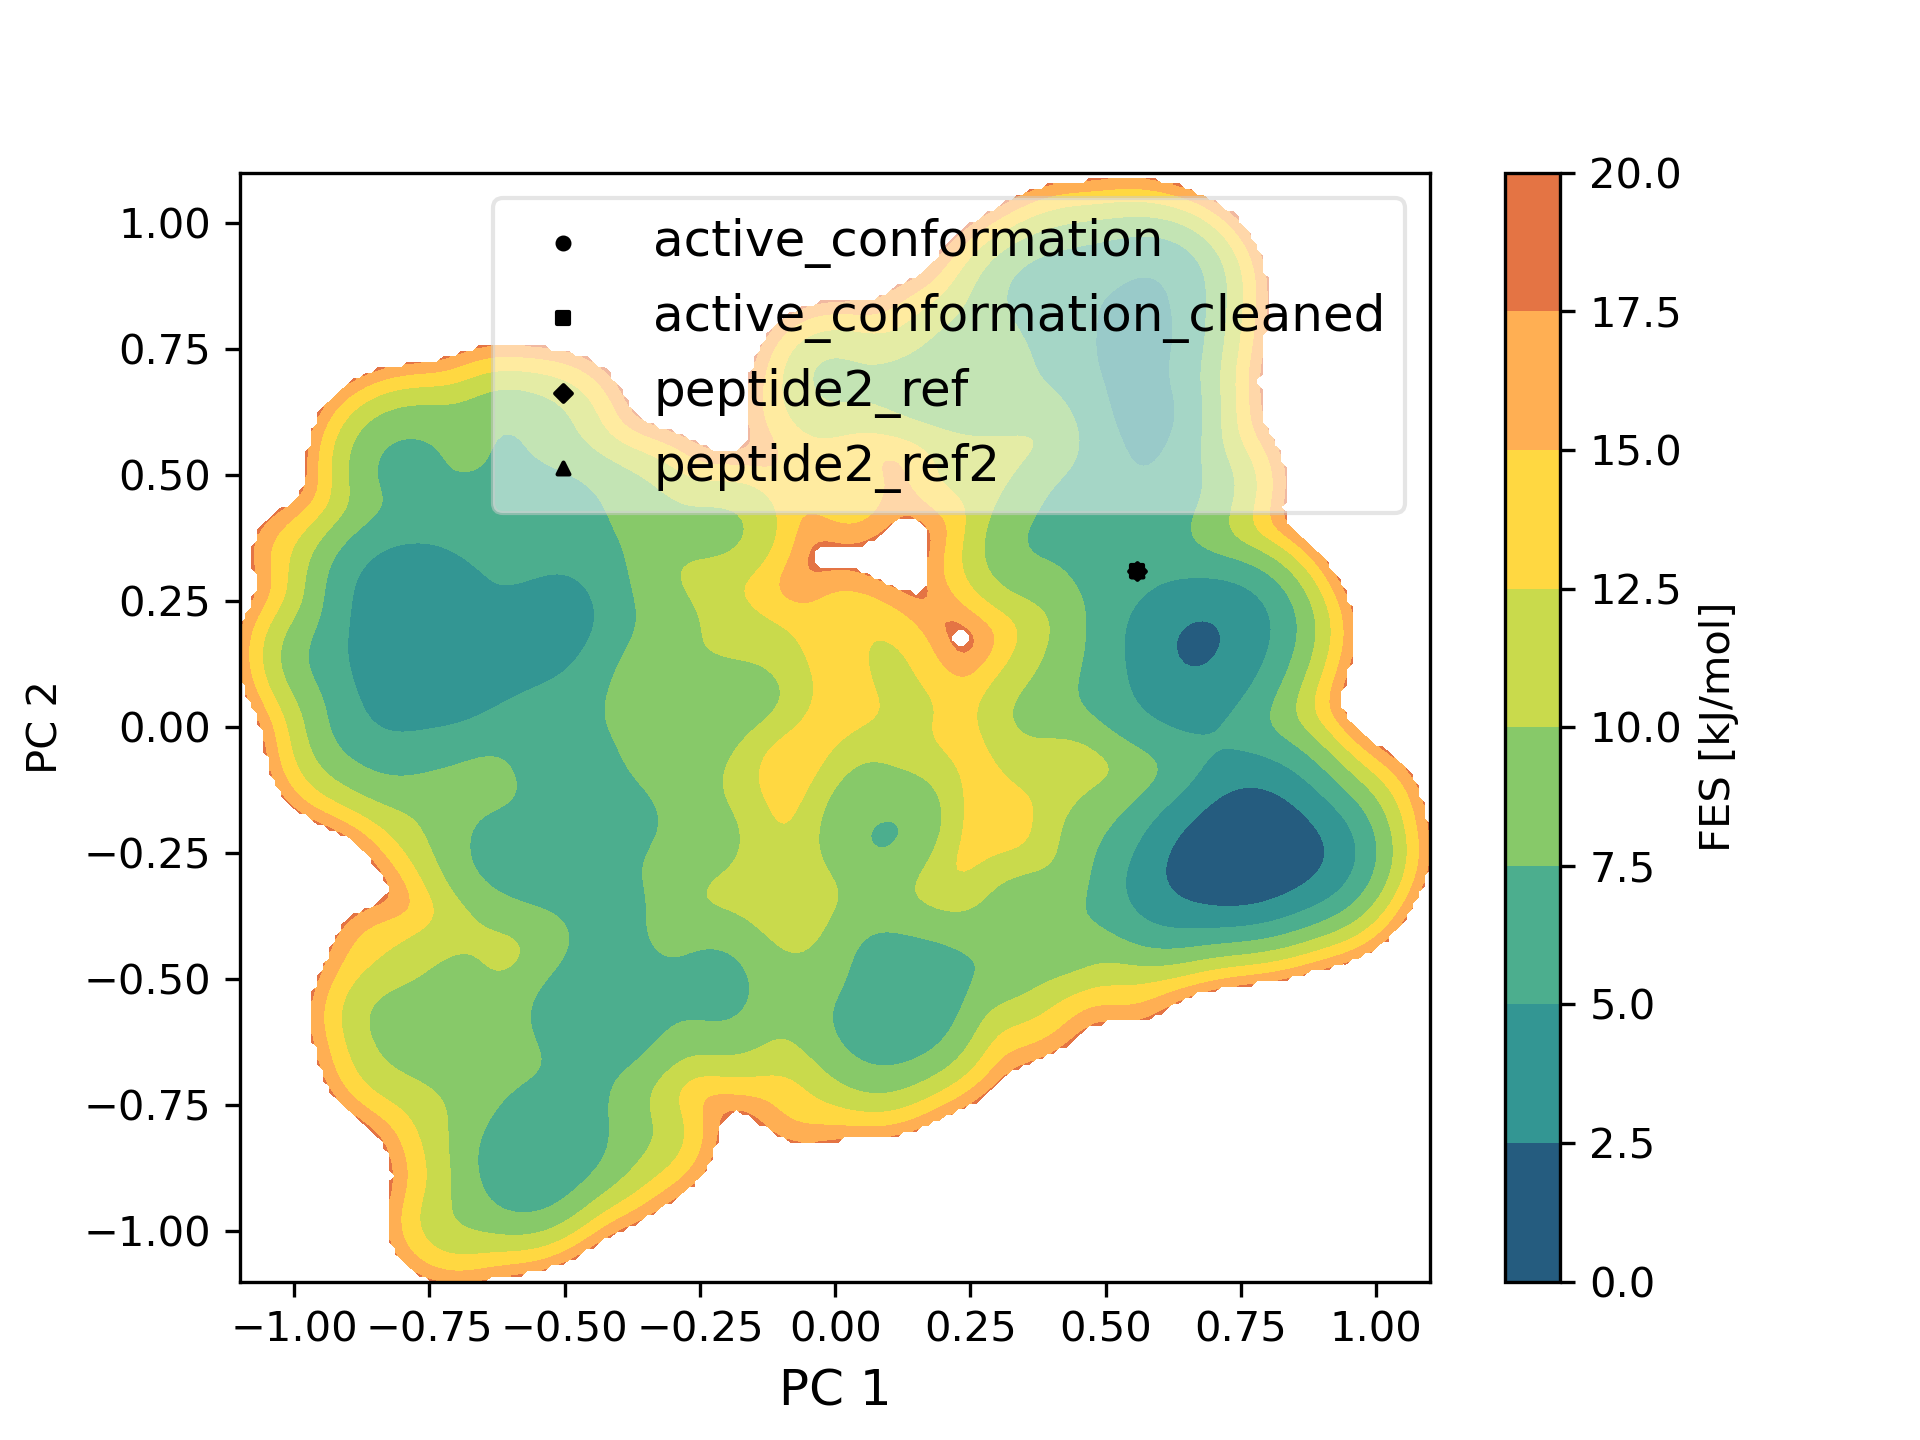

In [17]:
show_results('peptide2', 'all', 'pca')

### AE

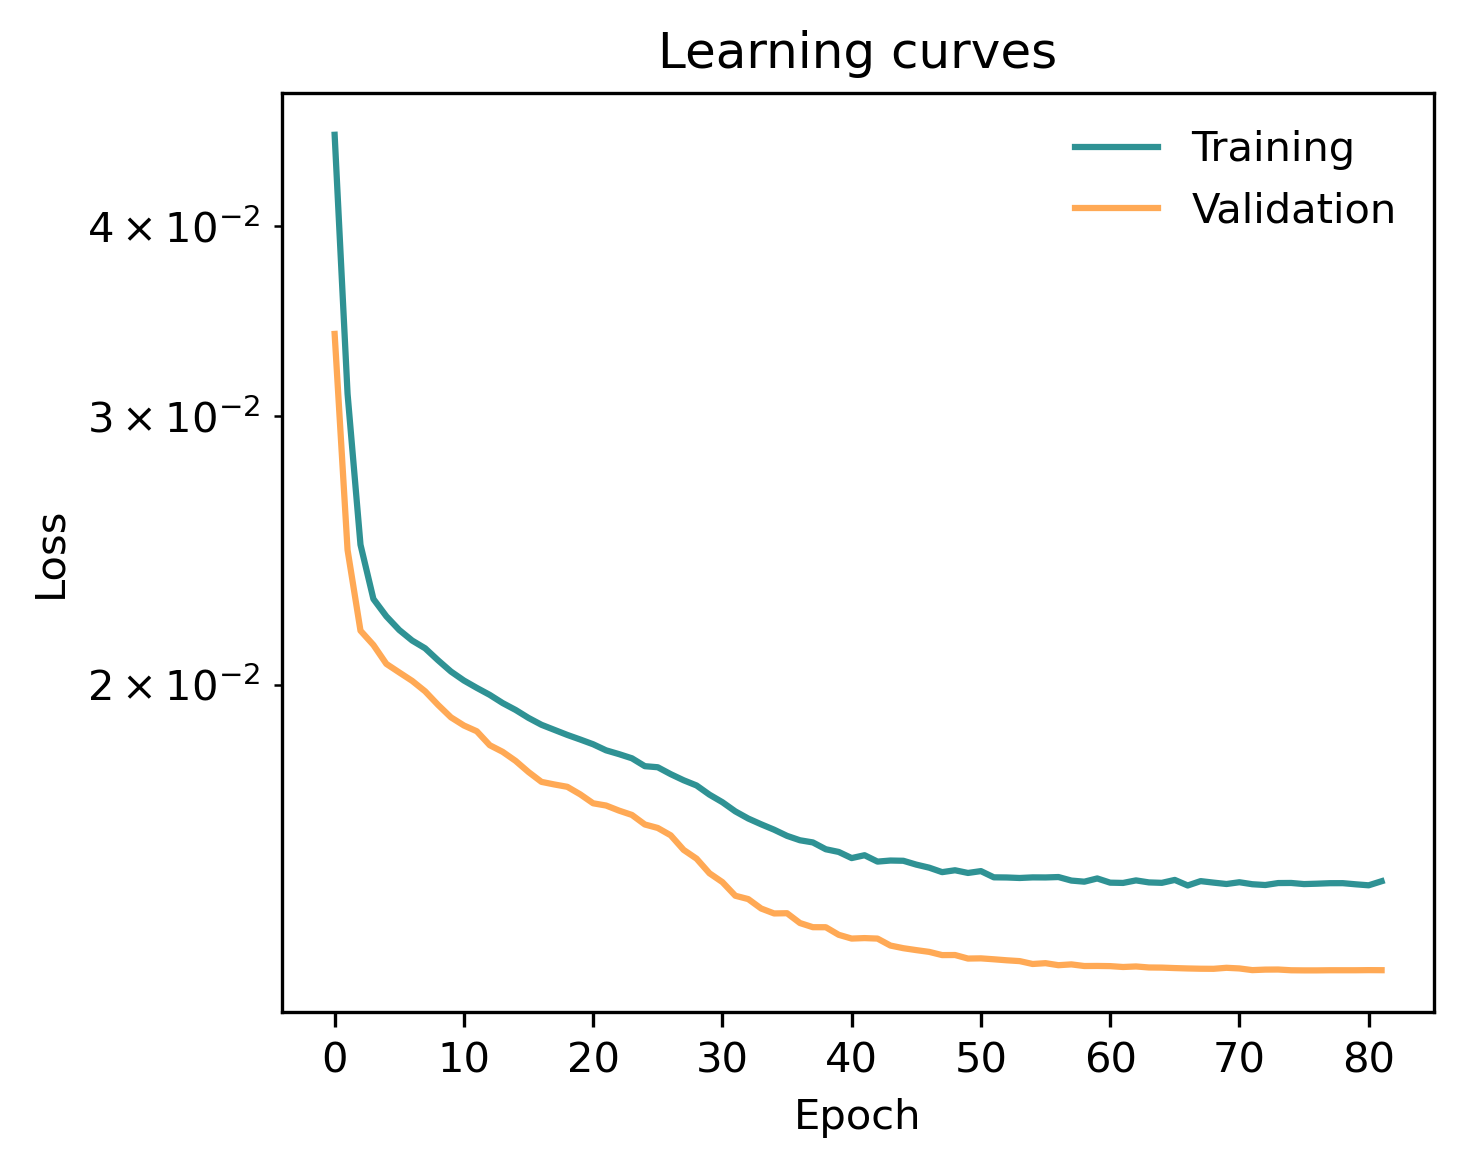

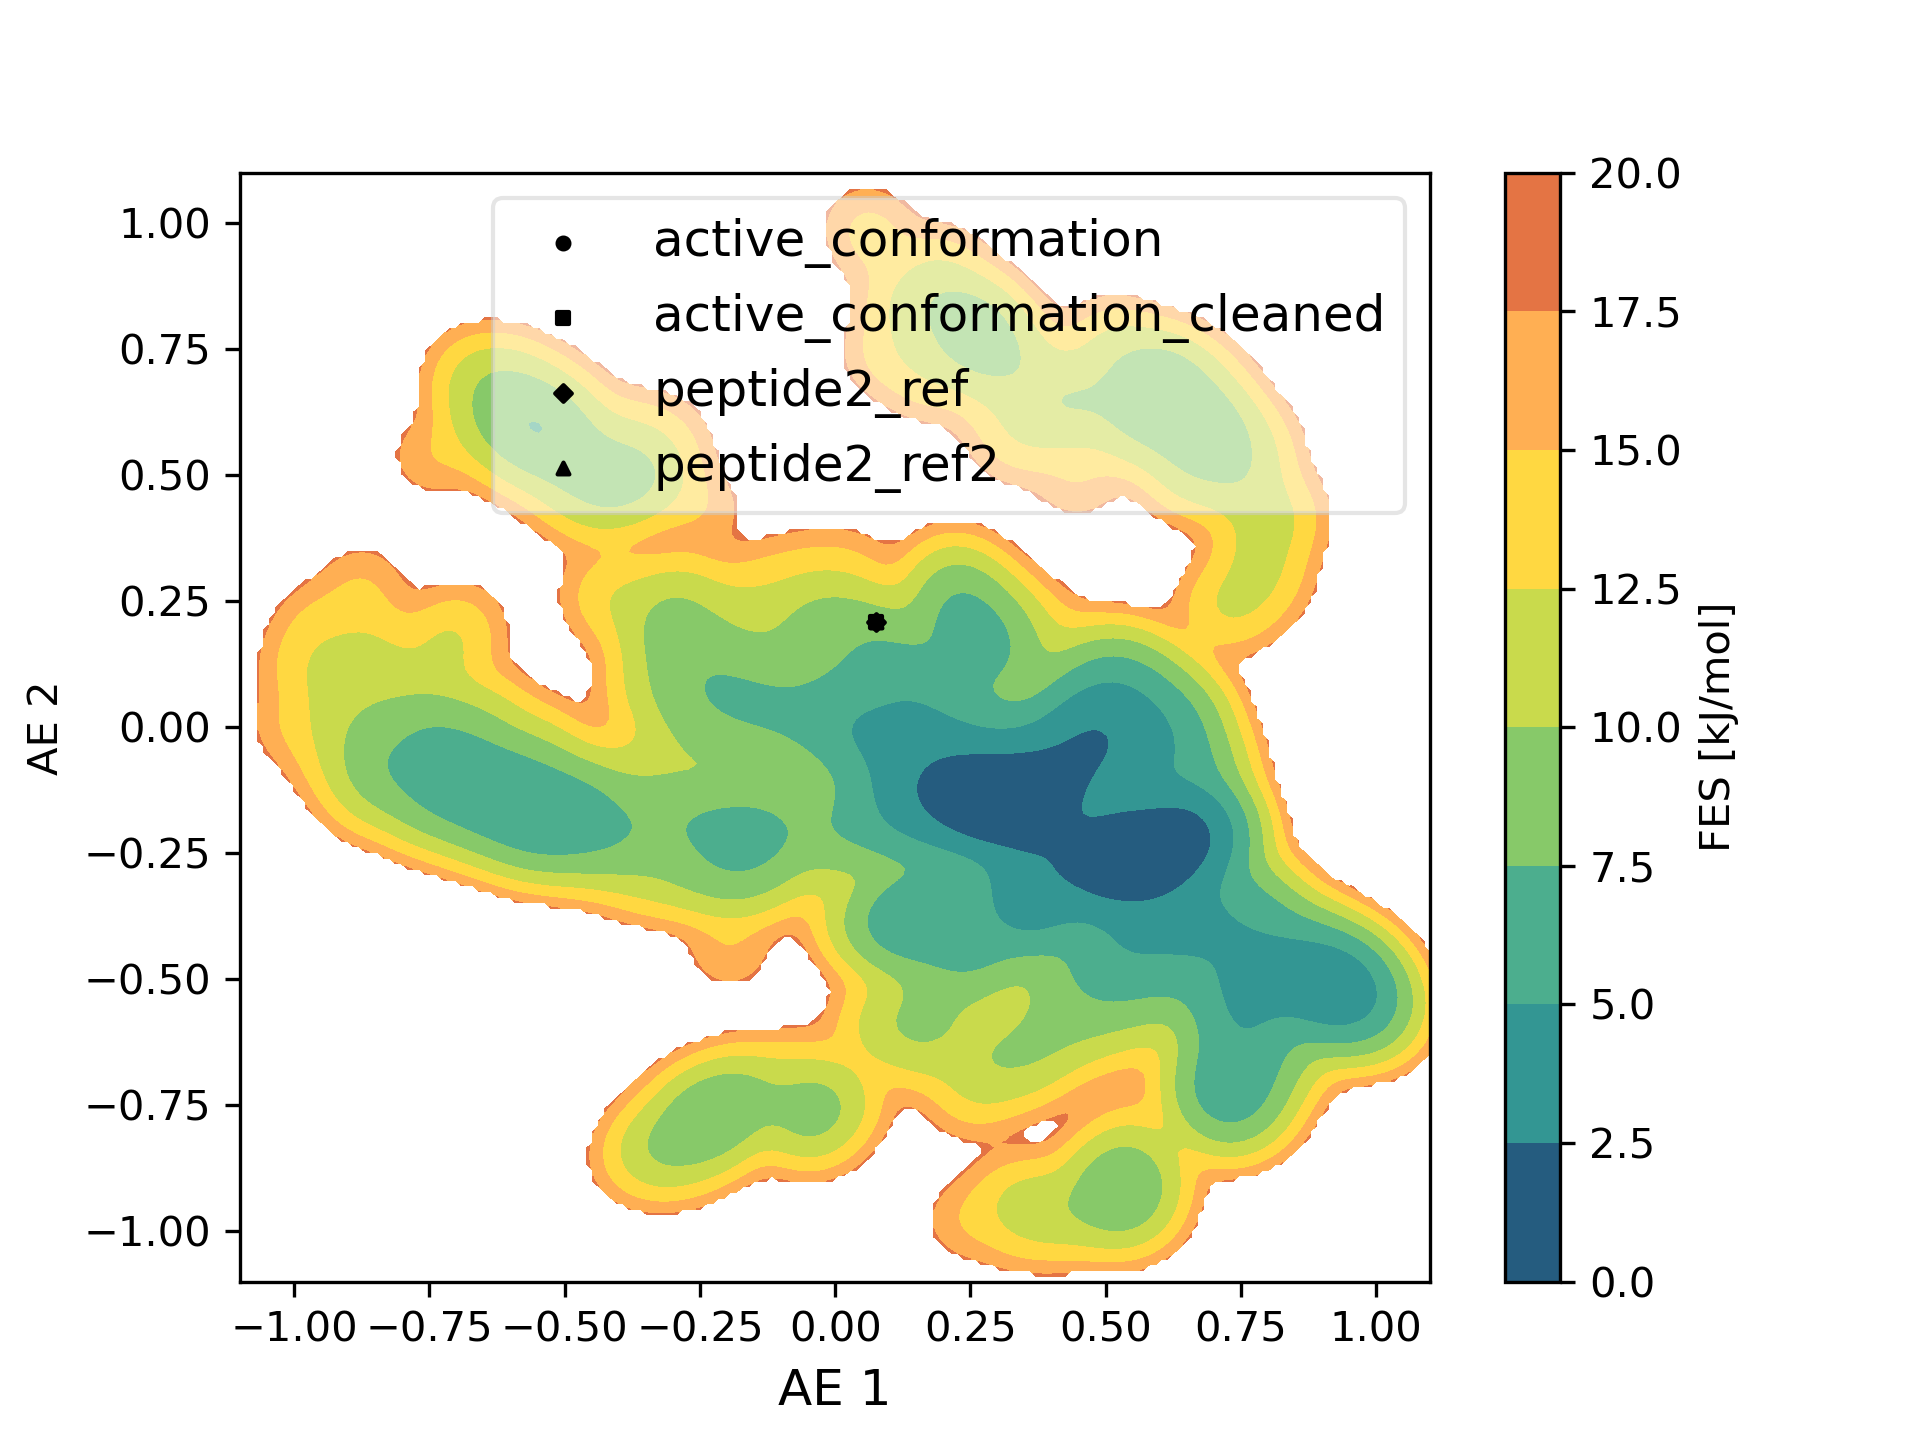

In [18]:
show_results('peptide2', 'all', 'ae')

## Peptide 7

INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/peptide7.xtc
/home/pnavarro/.conda/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/pnavarro/.conda/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:747: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 418 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED drive

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/peptide7.xtc


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 08 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation.pdb
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 418 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/torsions/compute_features/active_conformation/torsions.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/torsions/compute_features/active_conformation/active_conformation.pdb --natoms 186


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation.pdb


INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 418 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/torsions/compute_features/active_conformation_cleaned/torsions.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation_cleaned.pdb --natoms 186
INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation_cleaned.pdb


INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref.pdb
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 418 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/torsions/compute_features/peptide7_ref/torsions.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref.pdb --natoms 186
INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref.pdb


INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref2.pdb
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 418 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/torsions/compute_features/peptide7_ref2/torsions.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref2.pdb --natoms 186
INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 00 s
INFO:deep_cartograph:==================
INFO:deep_cartograph:Filtering features
INFO:deep_cartograph:==================
INFO:deep_cartograph:Finding the featur

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref2.pdb


INFO:deep_cartograph.tools.filter_features.filtering:Filtered 227 features.
INFO:deep_cartograph:Elapsed time (Filter features): 00 h 00 min 39 s
INFO:deep_cartograph.modules.common.common: Using features in /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/torsions/filter_features/filtered_features.txt
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of Collective Variables
INFO:deep_cartograph:================================
INFO:deep_cartograph:Training of collective variables using the mlcolvar library.
INFO:deep_cartograph.tools.train_colvars.train_colvars_workflow:Collective variables to compute: ['pca', 'ae']
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Reading training data from colvars files...
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Number of features: 191
INFO:deep_cartograph.tools.train_colvars.cv_calculator:Number of samples: 5001
INFO:deep_cartograph.tools.tra

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/peptide7.xtc


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 10 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 923 features for dist


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation.pdb


INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/distances/compute_features/active_conformation/distances.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/distances/compute_features/active_conformation/active_conformation.pdb --natoms 186
INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 01 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation_cleaned.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation_cleaned.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 01 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 923 features for dist
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/distances/compute_features/peptide7_ref/distances.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref.pdb --natoms 186


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 01 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref2.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 923 features for dist
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/distances/compute_features/peptide7_ref2/distances.dat --mf_pdb /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref2.pdb --natoms 186


Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref2.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 01 s
INFO:deep_cartograph:==================
INFO:deep_cartograph:Filtering features
INFO:deep_cartograph:==================
INFO:deep_cartograph:Finding the features that contains the most information about the transitions or conformational changes.
INFO:deep_cartograph:The following algorithms are available:
INFO:deep_cartograph:- Hartigan's dip test filter. Keeps features that are not unimodal.
INFO:deep_cartograph:- Shannon entropy filter. Keeps features with entropy greater than a threshold.
INFO:deep_cartograph:- Standard deviation filter. Keeps features with standard deviation greater than a threshold.
INFO:deep_cartograph:Note that the all features must be in the same units to apply the entropy and standard deviation filters meaningfully.
INFO:deep_cartograph:Initial size of features set: 923.
INFO:deep_cartograph.tools.filter_features.filtering:Computing dip test.
INFO:deep_cartograph.tools.filter_features.filte

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/peptide7.xtc


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 18 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 923 features for dist
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 418 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/all/compute_features/active_conformation/all.dat -

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 01 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation_cleaned.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 923 features for dist
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 418 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/all/compute_features/active_conformation_c

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/active_conformation_cleaned.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 01 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 923 features for dist
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 418 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/all/compute_features/peptide7_ref/all.dat --mf_pdb /home/

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 01 s
INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref2.pdb
INFO:deep_cartograph.modules.md.md:Provided topology contains bonds, distances between bonded atoms will be excluded.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 923 features for dist
INFO:deep_cartograph.modules.md.md:Topology contains bonds. Using bonds to find dihedrals.
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 418 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: plumed driver --plumed /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/output/peptide7/all/compute_features/peptide7_ref2/all.dat --mf_pdb /hom

Traj_path:  /home/pnavarro/repos/NBDsoftware/deep_cartograph/deep_cartograph/data/peptide_ensemble/input/peptide7/active_conformation/peptide7_ref2.pdb


INFO:deep_cartograph:Elapsed time (Compute features): 00 h 00 min 01 s
INFO:deep_cartograph:==================
INFO:deep_cartograph:Filtering features
INFO:deep_cartograph:==================
INFO:deep_cartograph:Finding the features that contains the most information about the transitions or conformational changes.
INFO:deep_cartograph:The following algorithms are available:
INFO:deep_cartograph:- Hartigan's dip test filter. Keeps features that are not unimodal.
INFO:deep_cartograph:- Shannon entropy filter. Keeps features with entropy greater than a threshold.
INFO:deep_cartograph:- Standard deviation filter. Keeps features with standard deviation greater than a threshold.
INFO:deep_cartograph:Note that the all features must be in the same units to apply the entropy and standard deviation filters meaningfully.
INFO:deep_cartograph:Initial size of features set: 1341.
INFO:deep_cartograph.tools.filter_features.filtering:Computing dip test.
INFO:deep_cartograph.tools.filter_features.filt

<Figure size 640x480 with 0 Axes>

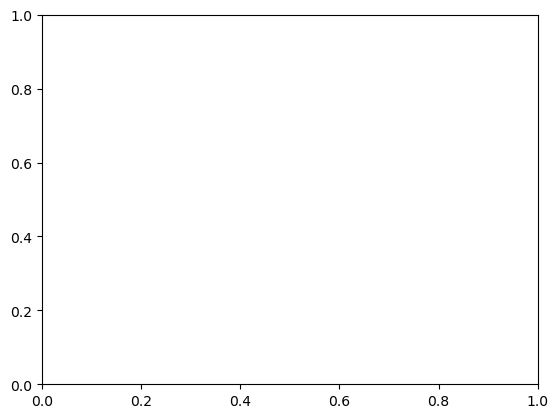

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

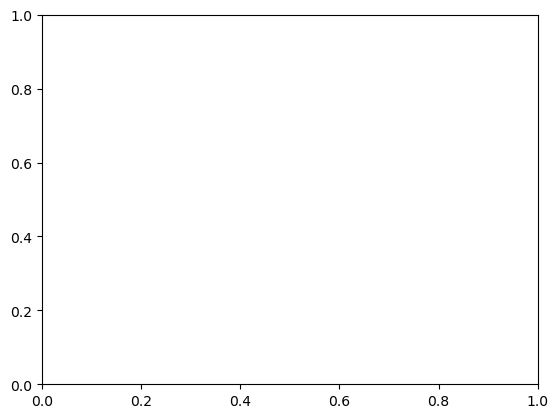

<Figure size 640x480 with 0 Axes>

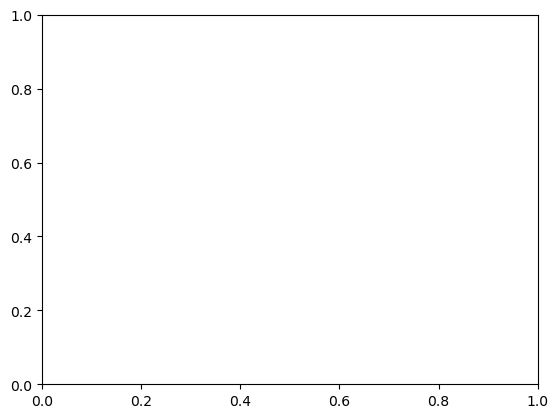

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

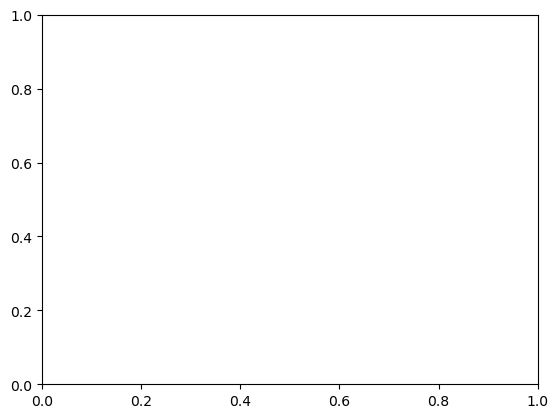

<Figure size 640x480 with 0 Axes>

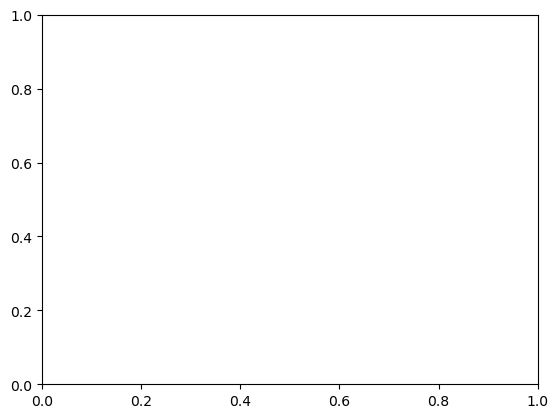

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

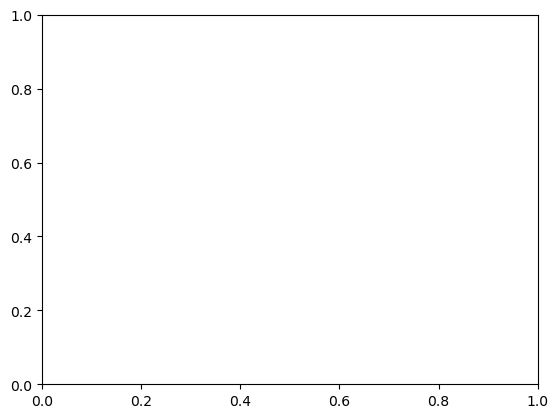

In [8]:
run_deep_cartograph('peptide7', 'torsions')
run_deep_cartograph('peptide7', 'distances')
run_deep_cartograph('peptide7', 'all')

### PCA

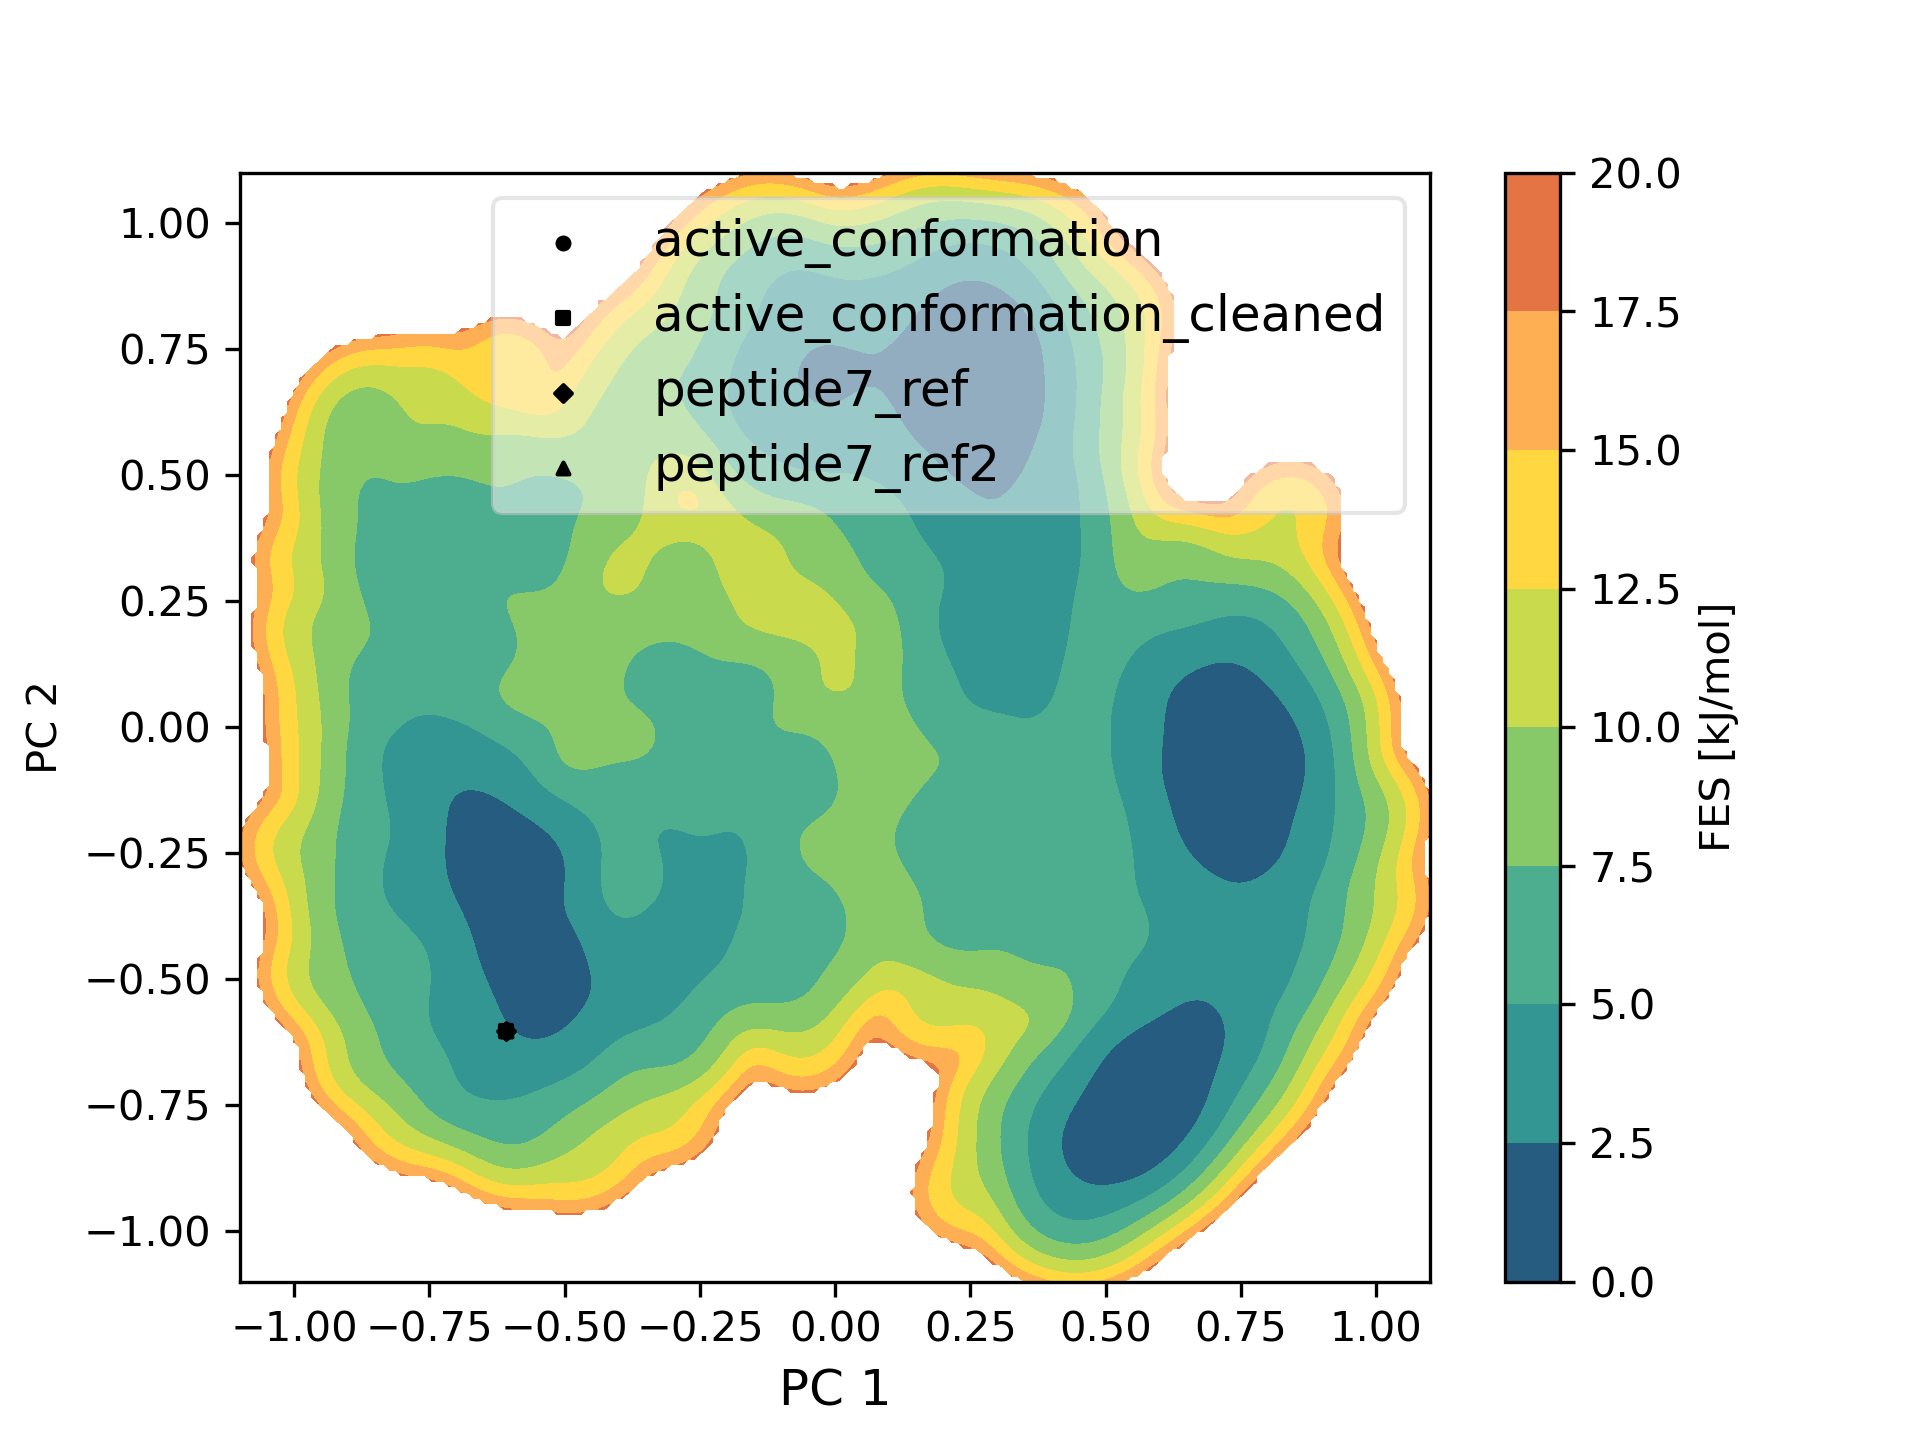

In [19]:
show_results('peptide7', 'all', 'pca')

### AE

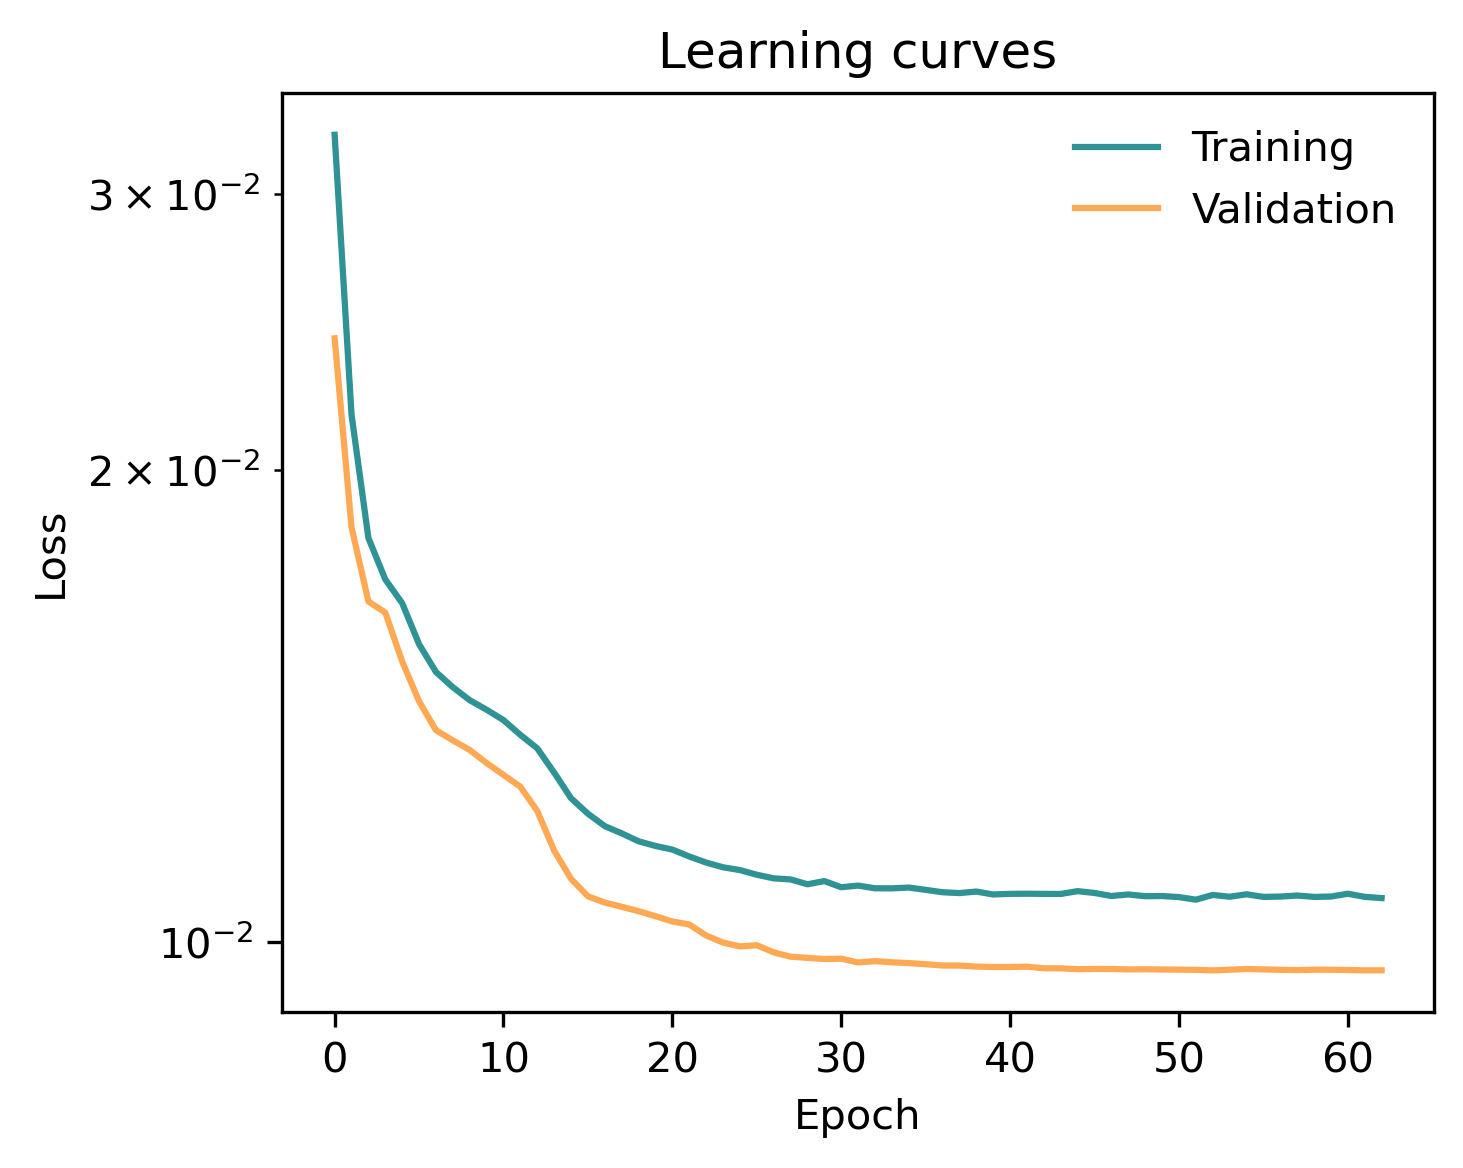

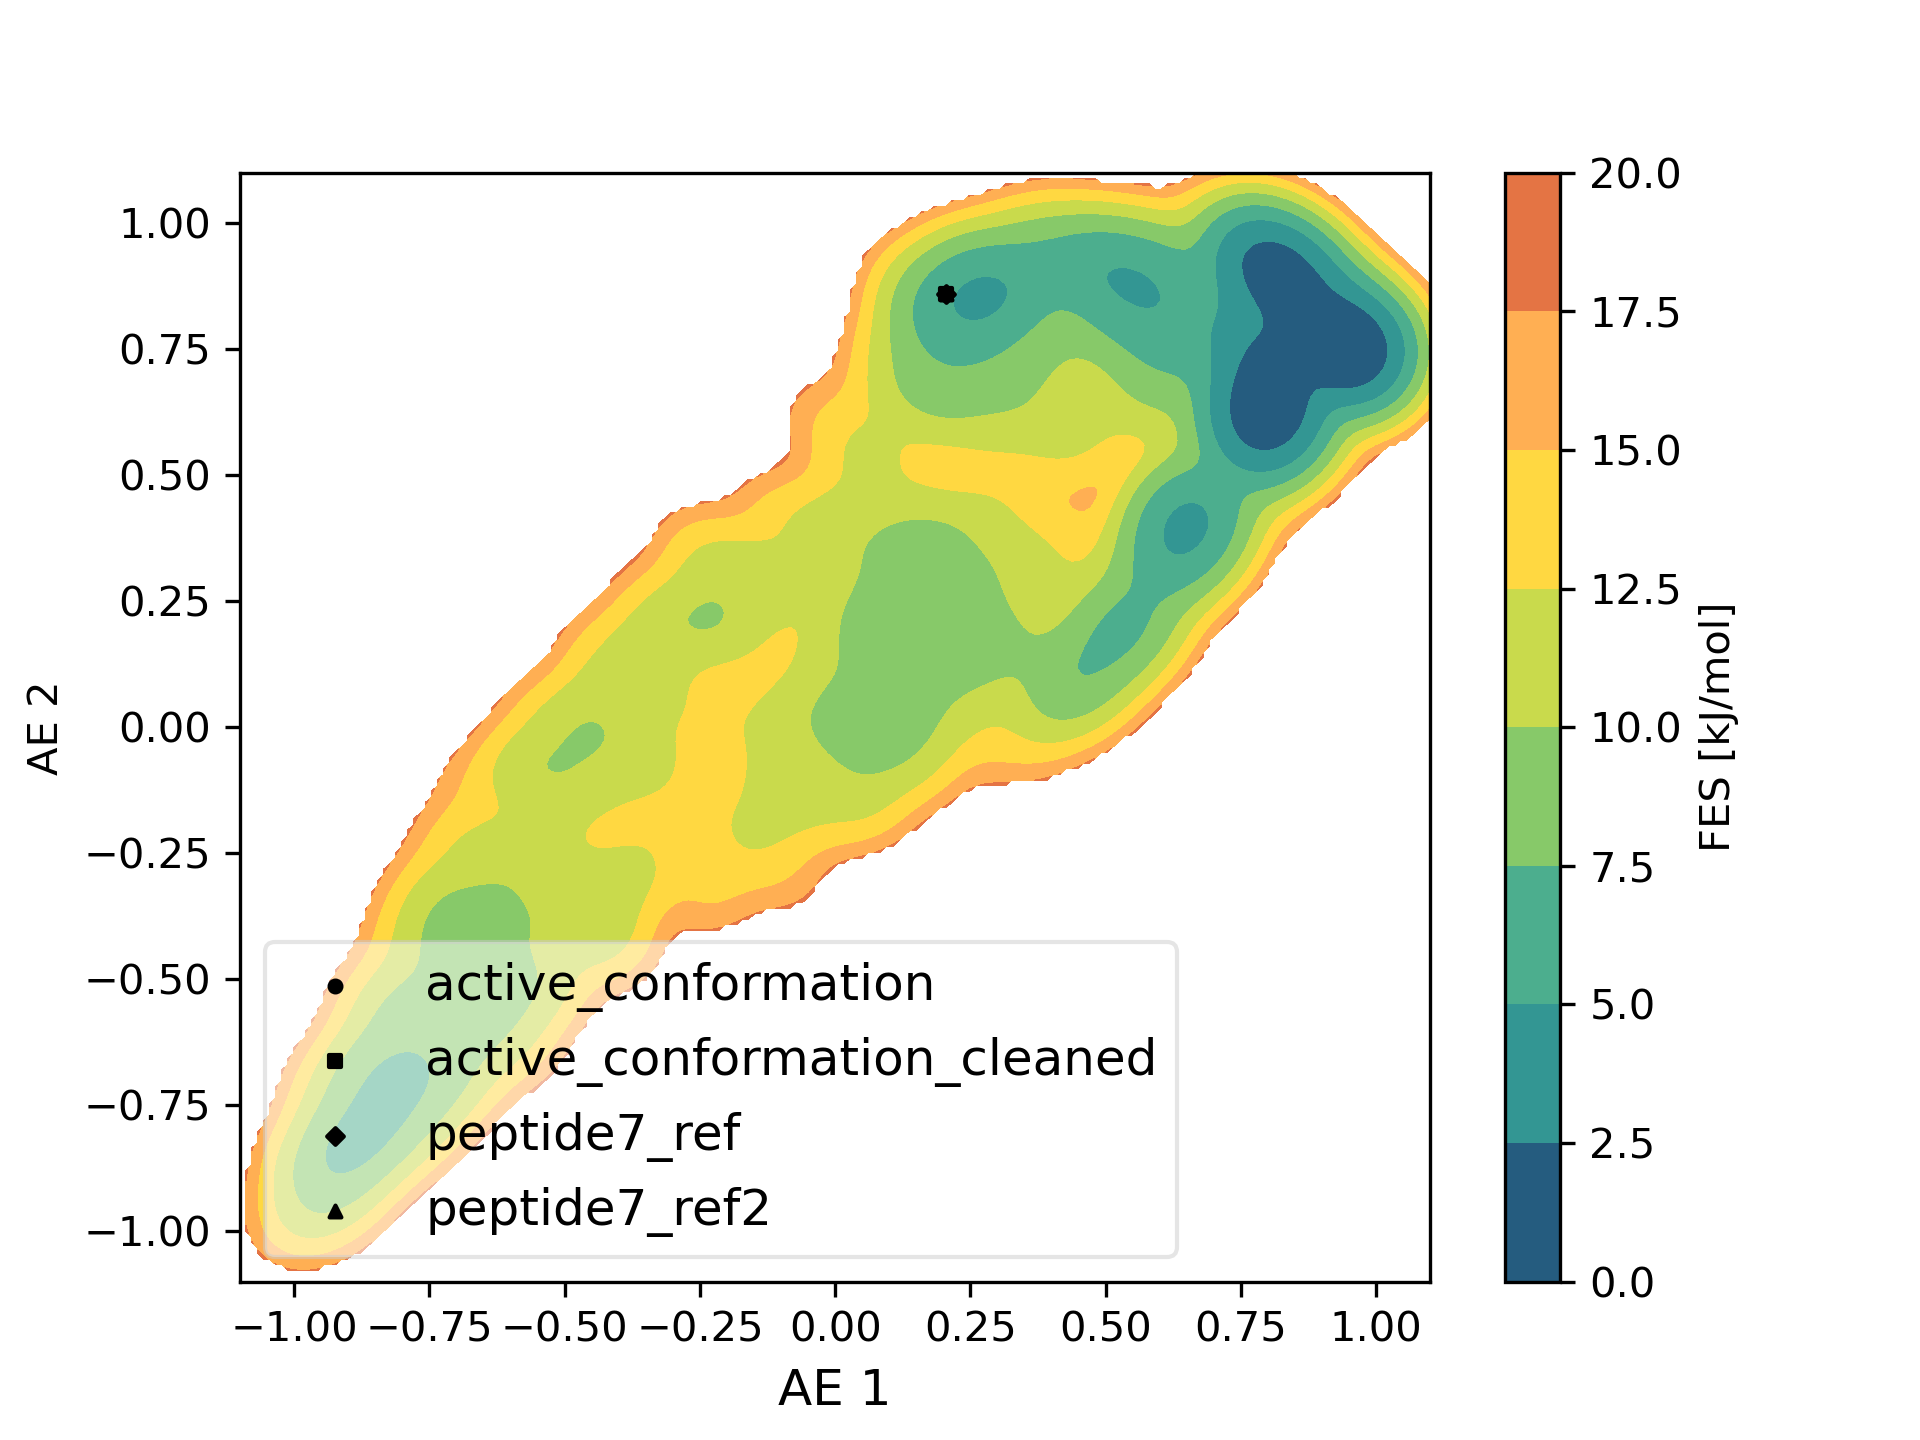

In [20]:
show_results('peptide7', 'all', 'ae')